# __Models and Results__

In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [3]:
# import data for training models
vet_df = pd.read_excel('data_clean_1.xlsx')

In [5]:
# import data on first 10 college players drafted
rookie_df = pd.read_excel('2024_drafted_college_players_v2.xlsx')
rookies = rookie_df.to_dict('records')

In [7]:
# train models to predict:
# 1. NBA rookie year minutes per game
X = vet_df.loc[:, ['COL_FG_PCT', 'COL_FG3_PCT', 'COL_PTS_PERG']]
Y = vet_df.loc[:, 'PRO_MIN_PERG']
model = sm.OLS(Y, X)
mpg_model = model.fit()

# 2. NBA rookie year points per game
X = vet_df.loc[:, ['COL_PTS_PERG', 'COL_FG_PCT']]
Y = vet_df.loc[:, 'PRO_PTS_PERG']
model = sm.OLS(Y, X)
ppg_model = model.fit()

# 3. NBA rookie year assists per game
X = vet_df.loc[:, 'COL_AST_PERG']
Y = vet_df.loc[:, 'PRO_AST_PERG']
model = sm.OLS(Y, X)
apg_model = model.fit()

# 4. NBA rookie year rebounds per game
X = vet_df.loc[:, ['COL_REB_PERG', 'COL_FG_PCT']]
Y = vet_df.loc[:, 'PRO_REB_PERG']
model = sm.OLS(Y, X)
rpg_model = model.fit()

# 5. NBA rookie year field goal percentage
X = vet_df.loc[:, ['COL_REB_PERG', 'COL_FG_PCT']]
Y = vet_df.loc[:, 'PRO_FG_PCT']
model = sm.OLS(Y, X)
fgpct_model = model.fit()

In [9]:
# predicts performance statistics for each player using models and outputs predictions
print('NBA rookie year predicted performance statistics:')
print(f'{'Name':>18}{'MPG':>6}{'PPG':>5}{'APG':>5}{'RPG':>5}{'FG%':>6}')
for player in rookies:
    mpg = mpg_model.predict([player['fgpct'], player['fg3pct'], player['ppg']])[0]
    ppg = ppg_model.predict([player['ppg'], player['fgpct']])[0]
    apg = round(apg_model.predict(player['apg'])[0], 1)
    rpg = rpg_model.predict([player['rpg'], player['fgpct']])[0]
    fgpct = fgpct_model.predict([player['rpg'], player['fgpct']])[0]
    
    print(f'{player['fullname']:>18}{mpg:>6.3}{ppg:>5.2}{apg:>5.2}{rpg:>5.2}{fgpct*100:>6.3}')

NBA rookie year predicted performance statistics:
              Name   MPG  PPG  APG  RPG   FG%
     Reed Sheppard  16.6  5.1  1.9  2.2  45.7
    Stephon Castle  12.6  4.5  1.2  2.1  40.7
   Donovan Clingan  15.4  5.7  0.6  3.1  55.6
    Rob Dillingham  15.4  5.4  1.6  1.8  40.1
         Zach Edey  20.6  8.2  0.8  4.1  56.5
     Cody Williams  15.5  5.1  0.7  2.0  46.5
      Devin Carter  14.2  5.0  0.5  1.8  37.4
Carlton Carrington  12.9  4.8  1.7  2.1  36.0
        Kelel Ware  17.1  6.1  0.6  3.5  52.4
      Jared McCain  14.7  5.2  0.8  2.2  40.0


In [11]:
# predicts performance statistics for highly anticipated player Lebron James Jr.
bronny = {'fullname':'Lebron James Jr',
          'ppg': 4.8,
          'rpg': 2.8,
          'apg': 2.1,
          'fgpct': 0.366,
          'fg3pct': 0.267
          }

mpg = mpg_model.predict([bronny['fgpct'], bronny['fg3pct'], bronny['ppg']])[0]
ppg = ppg_model.predict([bronny['ppg'], bronny['fgpct']])[0]
apg = round(apg_model.predict(bronny['apg'])[0], 1)
rpg = rpg_model.predict([bronny['rpg'], bronny['fgpct']])[0]
fgpct = fgpct_model.predict([bronny['rpg'], bronny['fgpct']])[0]

print(f'{'Name':>18}{'MPG':>6}{'PPG':>5}{'APG':>5}{'RPG':>5}{'FG%':>6}')
print(f'{bronny['fullname']:>18}{mpg:>6.3}{ppg:>5.2}{apg:>5.2}{rpg:>5.2}{fgpct*100:>6.3}')

              Name   MPG  PPG  APG  RPG   FG%
   Lebron James Jr   9.5  2.7  0.9  1.5  31.2


# __Regression Analysis__

In [13]:
# check for multicollinearity in independent variables, not present
vet_df[['COL_GP', 'COL_PTS_PERG', 'COL_REB_PERG', 'COL_AST_PERG', 'COL_FG_PCT', 'COL_FG3_PCT', 'COL_FT_PCT']].corr()

,COL_GP,COL_PTS_PERG,COL_REB_PERG,COL_AST_PERG,COL_FG_PCT,COL_FG3_PCT,COL_FT_PCT
COL_GP,1.000000,0.035289,-0.111904,0.113072,-0.028678,0.098787,0.089800
COL_PTS_PERG,0.035289,1.000000,0.185593,0.354476,-0.067504,0.330072,0.396708
COL_REB_PERG,-0.111904,0.185593,1.000000,-0.292733,0.472084,-0.238144,-0.298123
COL_AST_PERG,0.113072,0.354476,-0.292733,1.000000,-0.305697,0.291345,0.269369
COL_FG_PCT,-0.028678,-0.067504,0.472084,-0.305697,1.000000,-0.428199,-0.416074
COL_FG3_PCT,0.098787,0.330072,-0.238144,0.291345,-0.428199,1.000000,0.491814
COL_FT_PCT,0.089800,0.396708,-0.298123,0.269369,-0.416074,0.491814,1.000000


In [15]:
# model summary of minutes per game model
mpg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           PRO_MIN_PERG   R-squared (uncentered):                   0.753
Model:                            OLS   Adj. R-squared (uncentered):              0.752
Method:                 Least Squares   F-statistic:                              538.1
Date:                Sun, 29 Sep 2024   Prob (F-statistic):                   3.06e-160
Time:                        13:44:41   Log-Likelihood:                         -1876.0
No. Observations:                 532   AIC:                                      3758.
Df Residuals:                     529   BIC:                                      3771.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
COL_FG_PCT      15.2322      2.506      6.078      0.000      10.309      20.155
COL_FG3_PCT     10.5597      3.018      3.499      0.001       4.631      16.488
COL_PTS_PERG     0.2309      0.092      2.507      0.012       0.050       0.412
==============================================================================
Omnibus:                       49.694   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.092
Skew:                           0.429   Prob(JB):                     4.82e-07
Kurtosis:                       2.242   Cond. No.                         135.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
# decent r-squared
# confidence interval = 95%
# p-value for the f-test is less than 0.05, reject null hypothesis for overall model
# p-value for the t-test of independent variable COL_FG_PCT is less than 0.05, reject null hypothesis for independent variable COL_FG_PCT
# p-value for the t-test of independent variable COL_FG3_PCT is less than 0.05, reject null hypothesis for independent variable COL_FG3_PCT
# p-value for the t-test of independent variable COL_PTS_PERG is less than 0.05, reject null hypothesis for independent variable COL_PTS_PERG

Text(0.5, 1.0, 'Predicted Values Distribution')

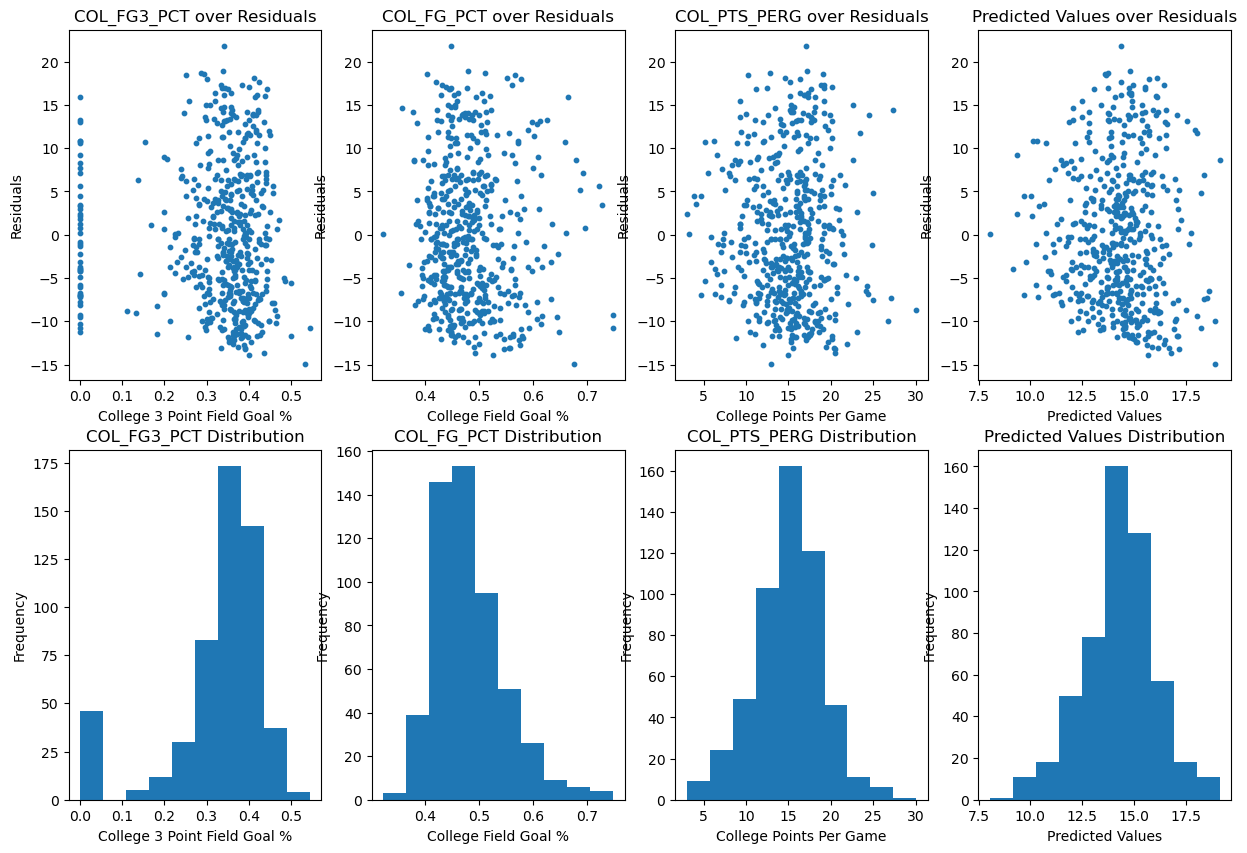

In [19]:
# analyze residuals plotted against independent variables and predicted values
# accompanying historgrams for independent variables and predicted values
min_df = vet_df.loc[:,['PRO_MIN_PERG', 'COL_FG3_PCT', 'COL_FG_PCT', 'COL_PTS_PERG']]
min_df['PREDICTED'] = mpg_model.fittedvalues.values.tolist()
min_df['RESIDUALS'] = mpg_model.resid.values.tolist()

fig = plt.figure(figsize=(15,10))
axes = fig.subplots(2,4)

axes[0,0].scatter(min_df['COL_FG3_PCT'], min_df['RESIDUALS'],s=10)
axes[0,0].set_xlabel('College 3 Point Field Goal %')
axes[0,0].set_ylabel('Residuals')
axes[0,0].set_title('COL_FG3_PCT over Residuals')

axes[0,1].scatter(min_df['COL_FG_PCT'], min_df['RESIDUALS'], s=10)
axes[0,1].set_xlabel('College Field Goal %')
axes[0,1].set_ylabel('Residuals')
axes[0,1].set_title('COL_FG_PCT over Residuals')

axes[0,2].scatter(min_df['COL_PTS_PERG'], min_df['RESIDUALS'], s=10)
axes[0,2].set_xlabel('College Points Per Game')
axes[0,2].set_ylabel('Residuals')
axes[0,2].set_title('COL_PTS_PERG over Residuals')

axes[0,3].scatter(min_df['PREDICTED'], min_df['RESIDUALS'], s=10)
axes[0,3].set_xlabel('Predicted Values')
axes[0,3].set_ylabel('Residuals')
axes[0,3].set_title('Predicted Values over Residuals')

axes[1,0].hist(min_df['COL_FG3_PCT'])
axes[1,0].set_xlabel('College 3 Point Field Goal %')
axes[1,0].set_ylabel('Frequency')
axes[1,0].set_title('COL_FG3_PCT Distribution')

axes[1,1].hist(min_df['COL_FG_PCT'])
axes[1,1].set_xlabel('College Field Goal %')
axes[1,1].set_ylabel('Frequency')
axes[1,1].set_title('COL_FG_PCT Distribution')

axes[1,2].hist(min_df['COL_PTS_PERG'])
axes[1,2].set_xlabel('College Points Per Game')
axes[1,2].set_ylabel('Frequency')
axes[1,2].set_title('COL_PTS_PERG Distribution')

axes[1,3].hist(min_df['PREDICTED'])
axes[1,3].set_xlabel('Predicted Values')
axes[1,3].set_ylabel('Frequency')
axes[1,3].set_title('Predicted Values Distribution')

In [21]:
# residual plots fairly random
# irregular shape of residuals against COL_FG3_PCT explained by distribution of values

In [23]:
# model summary of points per game model
ppg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           PRO_PTS_PERG   R-squared (uncentered):                   0.650
Model:                            OLS   Adj. R-squared (uncentered):              0.649
Method:                 Least Squares   F-statistic:                              492.4
Date:                Sun, 29 Sep 2024   Prob (F-statistic):                   1.36e-121
Time:                        13:44:58   Log-Likelihood:                         -1494.0
No. Observations:                 532   AIC:                                      2992.
Df Residuals:                     530   BIC:                                      3001.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
COL_PTS_PERG     0.2062      0.038      5.475      0.000       0.132       0.280
COL_FG_PCT       4.7642      1.203      3.961      0.000       2.401       7.127
==============================================================================
Omnibus:                      101.190   Durbin-Watson:                   2.100
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              160.845
Skew:                           1.208   Prob(JB):                     1.18e-35
Kurtosis:                       4.193   Cond. No.                         107.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
# decent r-squared
# confidence interval = 95%
# p-value for the f-test is less than 0.05, reject null hypothesis for overall model
# p-value for the t-test of independent variable COL_PTS_PERG is less than 0.05, reject null hypothesis for independent variable COL_PTS_PERG
# p-value for the t-test of independent variable COL_FG_PCT is less than 0.05, reject null hypothesis for independent variable COL_FG_PCT

Text(0.5, 1.0, 'Predicted Values Dist.')

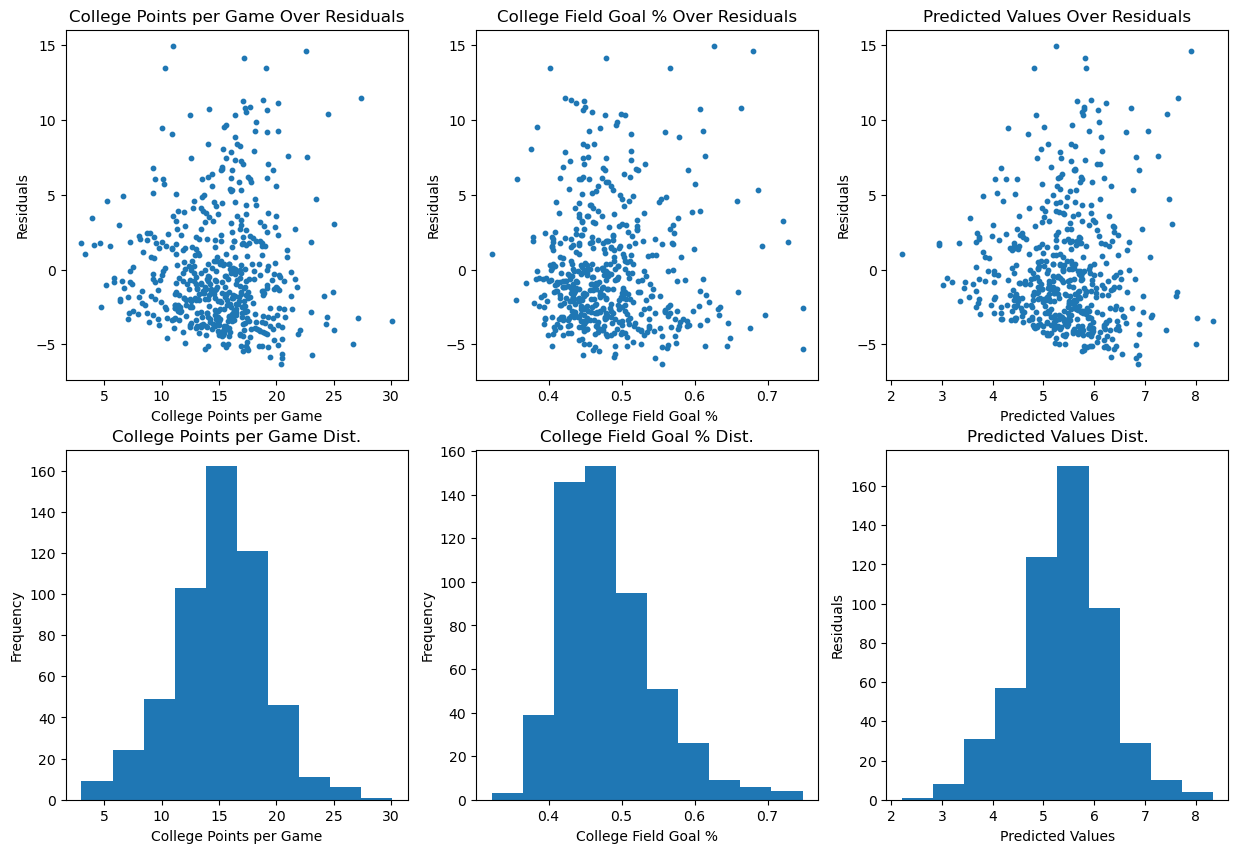

In [27]:
# analyze residuals plotted against independent variables and predicted values
# accompanying historgrams for independent variables and predicted values
pts_df = vet_df.loc[:, ['COL_PTS_PERG', 'COL_FG_PCT', 'PRO_PTS_PERG']]
pts_df['PREDICTED'] = ppg_model.fittedvalues.values.tolist()
pts_df['RESIDUALS'] = ppg_model.resid.values.tolist()

fig = plt.figure(figsize=(15,10))
axes = fig.subplots(2,3)

axes[0,0].scatter(pts_df['COL_PTS_PERG'],pts_df['RESIDUALS'], s=10)
axes[0,0].set_xlabel('College Points per Game')
axes[0,0].set_ylabel('Residuals')
axes[0,0].set_title('College Points per Game Over Residuals')

axes[0,1].scatter(pts_df['COL_FG_PCT'],pts_df['RESIDUALS'], s=10)
axes[0,1].set_xlabel('College Field Goal %')
axes[0,1].set_ylabel('Residuals')
axes[0,1].set_title('College Field Goal % Over Residuals')

axes[0,2].scatter(pts_df['PREDICTED'],pts_df['RESIDUALS'], s=10)
axes[0,2].set_xlabel('Predicted Values')
axes[0,2].set_ylabel('Residuals')
axes[0,2].set_title('Predicted Values Over Residuals')

axes[1,0].hist(pts_df['COL_PTS_PERG'])
axes[1,0].set_xlabel('College Points per Game')
axes[1,0].set_ylabel('Frequency')
axes[1,0].set_title('College Points per Game Dist.')

axes[1,1].hist(pts_df['COL_FG_PCT'])
axes[1,1].set_xlabel('College Field Goal %')
axes[1,1].set_ylabel('Frequency')
axes[1,1].set_title('College Field Goal % Dist.')

axes[1,2].hist(pts_df['PREDICTED'])
axes[1,2].set_xlabel('Predicted Values')
axes[1,2].set_ylabel('Residuals')
axes[1,2].set_title('Predicted Values Dist.')

In [29]:
# residual plots fairly random

In [31]:
# model summary of assists per game model
apg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           PRO_AST_PERG   R-squared (uncentered):                   0.617
Model:                            OLS   Adj. R-squared (uncentered):              0.616
Method:                 Least Squares   F-statistic:                              854.5
Date:                Sun, 29 Sep 2024   Prob (F-statistic):                   1.14e-112
Time:                        13:45:12   Log-Likelihood:                         -749.21
No. Observations:                 532   AIC:                                      1500.
Df Residuals:                     531   BIC:                                      1505.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
COL_AST_PERG     0.4217      0.014     29.232      0.000       0.393       0.450
==============================================================================
Omnibus:                      162.691   Durbin-Watson:                   2.108
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              644.045
Skew:                           1.345   Prob(JB):                    1.40e-140
Kurtosis:                       7.671   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
# decent r-squared
# confidence interval = 95%
# p-value for the f-test is less than 0.05, reject null hypothesis for overall model

Text(0.5, 1.0, 'Predicted Values Dist.')

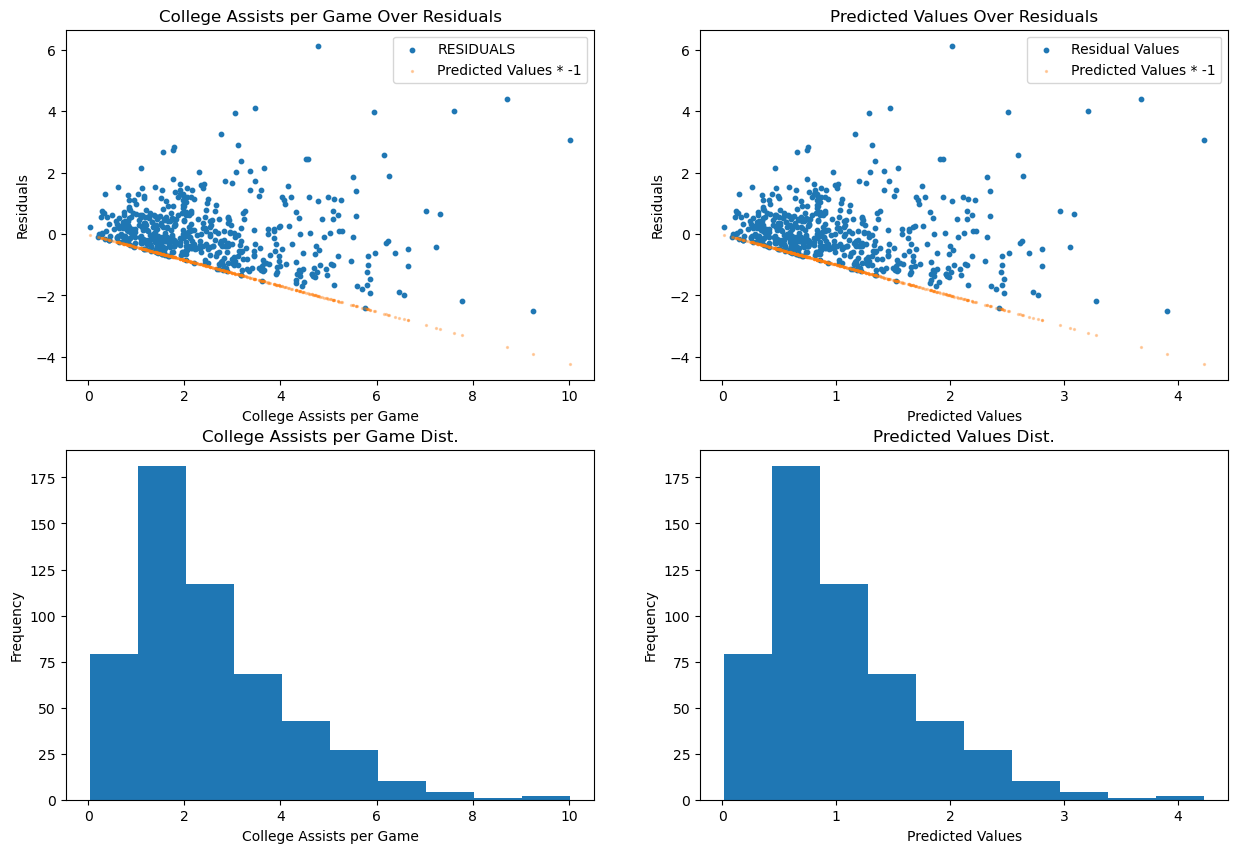

In [35]:
# analyze residuals plotted against independent variables and predicted values
# accompanying historgrams for independent variables and predicted values
ast_df = vet_df.loc[:, ['COL_AST_PERG', 'PRO_AST_PERG']]
ast_df['PREDICTED'] = apg_model.fittedvalues.values.tolist()
ast_df['RESIDUALS'] = apg_model.resid.values.tolist()

fig = plt.figure(figsize=(15,10))
axes = fig.subplots(2,2)

axes[0,0].scatter(ast_df['COL_AST_PERG'],ast_df['RESIDUALS'], s=10, label='RESIDUALS')
axes[0,0].scatter(ast_df['COL_AST_PERG'], -ast_df['PREDICTED'], s=2, label='Predicted Values * -1', alpha=0.3)
axes[0,0].set_xlabel('College Assists per Game')
axes[0,0].set_ylabel('Residuals')
axes[0,0].set_title('College Assists per Game Over Residuals')
axes[0,0].legend()

axes[0,1].scatter(ast_df['PREDICTED'],ast_df['RESIDUALS'], s=10, label='Residual Values')
axes[0,1].scatter(ast_df['PREDICTED'], -ast_df['PREDICTED'], s=2, label='Predicted Values * -1', alpha=0.3)
axes[0,1].set_xlabel('Predicted Values')
axes[0,1].set_ylabel('Residuals')
axes[0,1].set_title('Predicted Values Over Residuals')
axes[0,1].legend()

axes[1,0].hist(ast_df['COL_AST_PERG'])
axes[1,0].set_xlabel('College Assists per Game')
axes[1,0].set_ylabel('Frequency')
axes[1,0].set_title('College Assists per Game Dist.')

axes[1,1].hist(ast_df['PREDICTED'])
axes[1,1].set_xlabel('Predicted Values')
axes[1,1].set_ylabel('Frequency')
axes[1,1].set_title('Predicted Values Dist.')

In [43]:
# irregular shape of residual plots
# irregular shape aligns perfectly with line of predicted values * -1 plotted against the same independent variable
# irregular shape originates from COL_AST_PERG, its values cannot be zero
# irregular shape is fine
# plot of predicted values and PRO_AST_PERG

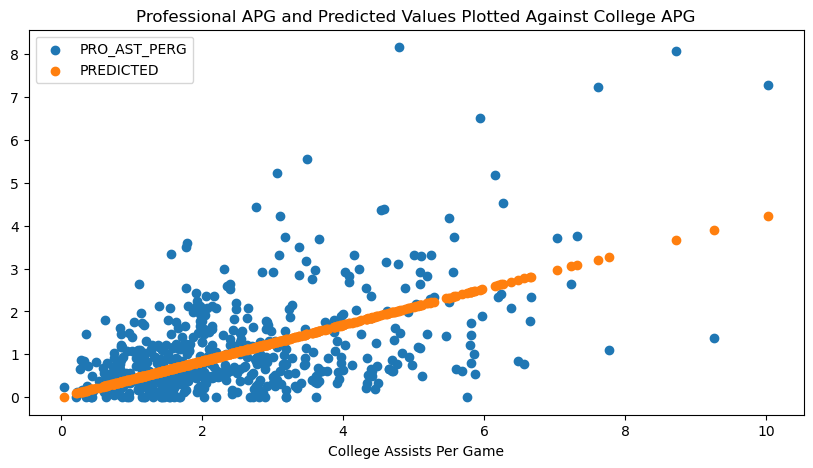

In [45]:
plt.figure(figsize=(10,5))
plt.scatter(ast_df['COL_AST_PERG'], ast_df['PRO_AST_PERG'], label='PRO_AST_PERG')
plt.scatter(ast_df['COL_AST_PERG'], ast_df['PREDICTED'], label='PREDICTED')
plt.xlabel('College Assists Per Game')
plt.title('Professional APG and Predicted Values Plotted Against College APG')
plt.legend()
# plot of PRO_AST_PERG and model predictions of PRO_AST_PERG against COL_AST_PERG to check that nothing strange is happening:

In [47]:
# model summary of assists per game model
rpg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           PRO_REB_PERG   R-squared (uncentered):                   0.709
Model:                            OLS   Adj. R-squared (uncentered):              0.708
Method:                 Least Squares   F-statistic:                              645.6
Date:                Sun, 29 Sep 2024   Prob (F-statistic):                   8.55e-143
Time:                        13:47:00   Log-Likelihood:                         -1006.9
No. Observations:                 532   AIC:                                      2018.
Df Residuals:                     530   BIC:                                      2026.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
COL_REB_PERG     0.2129      0.035      6.102      0.000       0.144       0.281
COL_FG_PCT       2.4127      0.458      5.264      0.000       1.512       3.313
==============================================================================
Omnibus:                       85.655   Durbin-Watson:                   2.087
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              140.246
Skew:                           0.996   Prob(JB):                     3.52e-31
Kurtosis:                       4.535   Cond. No.                         42.3
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
# decent r-squared
# confidence interval = 95%
# p-value for the f-test is less than 0.05, reject null hypothesis for overall model
# p-value for the t-test of independent variable COL_REB_PERG is less than 0.05, reject null hypothesis for independent variable COL_REB_PERG
# p-value for the t-test of independent variable COL_FG_PCT is less than 0.05, reject null hypothesis for independent variable COL_FG_PCT

Text(0.5, 1.0, 'Predicted Values Dist.')

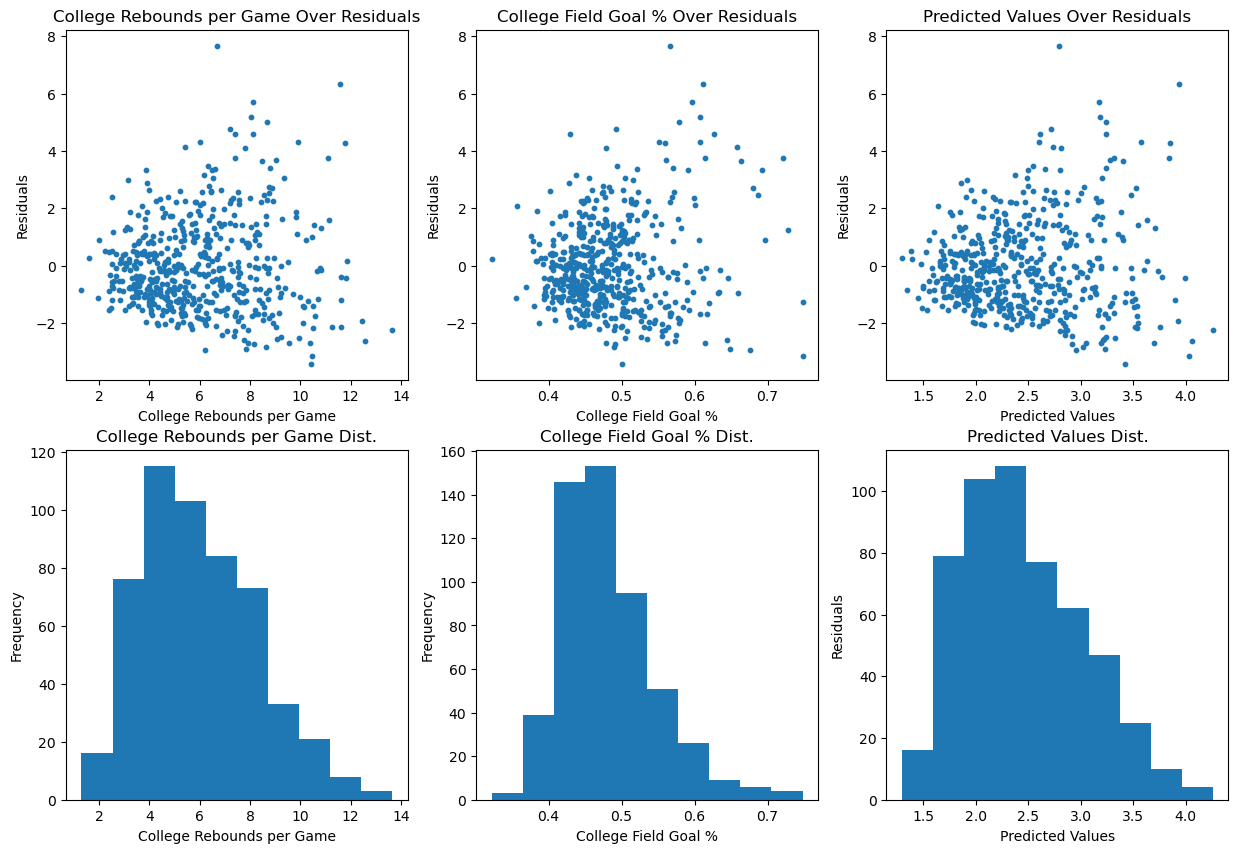

In [53]:
# analyze residuals plotted against independent variables and predicted values
# accompanying historgrams for independent variables and predicted values
reb_df = vet_df.loc[:, ['COL_REB_PERG', 'COL_FG_PCT', 'PRO_REB_PERG']]
reb_df['PREDICTED'] = rpg_model.fittedvalues.values.tolist()
reb_df['RESIDUALS'] = rpg_model.resid.values.tolist()

fig = plt.figure(figsize=(15,10))
axes = fig.subplots(2,3)

axes[0,0].scatter(reb_df['COL_REB_PERG'],reb_df['RESIDUALS'], s=10)
axes[0,0].set_xlabel('College Rebounds per Game')
axes[0,0].set_ylabel('Residuals')
axes[0,0].set_title('College Rebounds per Game Over Residuals')

axes[0,1].scatter(reb_df['COL_FG_PCT'],reb_df['RESIDUALS'], s=10)
axes[0,1].set_xlabel('College Field Goal %')
axes[0,1].set_ylabel('Residuals')
axes[0,1].set_title('College Field Goal % Over Residuals')

axes[0,2].scatter(reb_df['PREDICTED'],reb_df['RESIDUALS'], s=10)
axes[0,2].set_xlabel('Predicted Values')
axes[0,2].set_ylabel('Residuals')
axes[0,2].set_title('Predicted Values Over Residuals')

axes[1,0].hist(reb_df['COL_REB_PERG'])
axes[1,0].set_xlabel('College Rebounds per Game')
axes[1,0].set_ylabel('Frequency')
axes[1,0].set_title('College Rebounds per Game Dist.')

axes[1,1].hist(reb_df['COL_FG_PCT'])
axes[1,1].set_xlabel('College Field Goal %')
axes[1,1].set_ylabel('Frequency')
axes[1,1].set_title('College Field Goal % Dist.')

axes[1,2].hist(reb_df['PREDICTED'])
axes[1,2].set_xlabel('Predicted Values')
axes[1,2].set_ylabel('Residuals')
axes[1,2].set_title('Predicted Values Dist.')

In [55]:
# residuals plots fairly random

In [57]:
# model summary of field goal % model
fgpct_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             PRO_FG_PCT   R-squared (uncentered):                   0.955
Model:                            OLS   Adj. R-squared (uncentered):              0.955
Method:                 Least Squares   F-statistic:                              5628.
Date:                Sun, 29 Sep 2024   Prob (F-statistic):                        0.00
Time:                        13:50:59   Log-Likelihood:                          511.75
No. Observations:                 532   AIC:                                     -1020.
Df Residuals:                     530   BIC:                                     -1011.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
COL_REB_PERG     0.0046      0.002      2.287      0.023       0.001       0.009
COL_FG_PCT       0.8170      0.026     30.957      0.000       0.765       0.869
==============================================================================
Omnibus:                       23.203   Durbin-Watson:                   1.899
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               56.937
Skew:                          -0.142   Prob(JB):                     4.33e-13
Kurtosis:                       4.577   Cond. No.                         42.3
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [59]:
# EXCEPTIONAL r-squared
# confidence interval = 95%
# p-value for the f-test is less than 0.05, reject null hypothesis for overall model
# p-value for the t-test of independent variable COL_REB_PERG is less than 0.05, reject null hypothesis for independent variable COL_REB_PERG
# p-value for the t-test of independent variable COL_FG_PCT is less than 0.05, reject null hypothesis for independent variable COL_FG_PCT

Text(0.5, 1.0, 'Predicted Values Dist.')

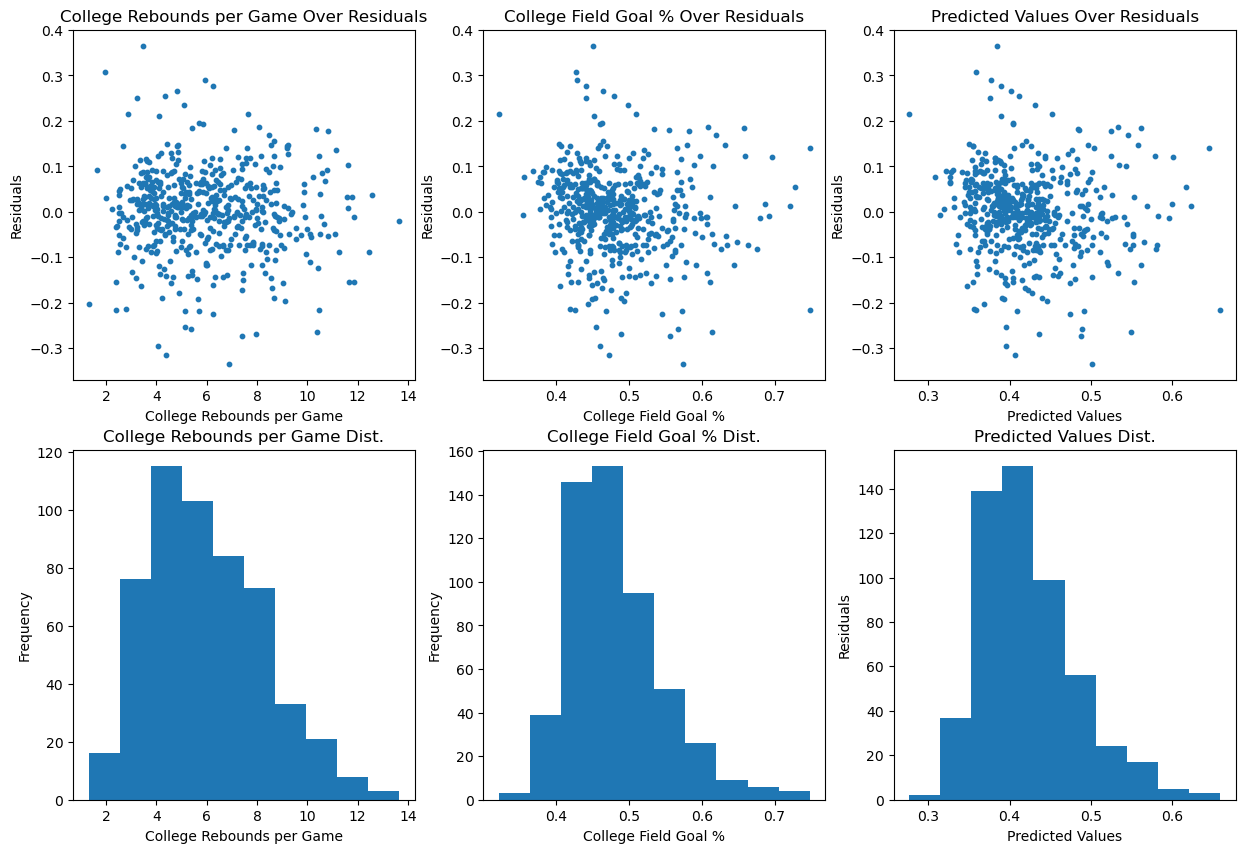

In [61]:
# analyze residuals plotted against independent variables and predicted values
# accompanying historgrams for independent variables and predicted values
fgpct_df = vet_df.loc[:, ['COL_REB_PERG', 'COL_FG_PCT', 'PRO_FG_PCT']]
fgpct_df['PREDICTED'] = fgpct_model.fittedvalues.values.tolist()
fgpct_df['RESIDUALS'] = fgpct_model.resid.values.tolist()

fig = plt.figure(figsize=(15,10))
axes = fig.subplots(2,3)

axes[0,0].scatter(fgpct_df['COL_REB_PERG'],fgpct_df['RESIDUALS'], s=10)
axes[0,0].set_xlabel('College Rebounds per Game')
axes[0,0].set_ylabel('Residuals')
axes[0,0].set_title('College Rebounds per Game Over Residuals')

axes[0,1].scatter(fgpct_df['COL_FG_PCT'],fgpct_df['RESIDUALS'], s=10)
axes[0,1].set_xlabel('College Field Goal %')
axes[0,1].set_ylabel('Residuals')
axes[0,1].set_title('College Field Goal % Over Residuals')

axes[0,2].scatter(fgpct_df['PREDICTED'],fgpct_df['RESIDUALS'], s=10)
axes[0,2].set_xlabel('Predicted Values')
axes[0,2].set_ylabel('Residuals')
axes[0,2].set_title('Predicted Values Over Residuals')

axes[1,0].hist(fgpct_df['COL_REB_PERG'])
axes[1,0].set_xlabel('College Rebounds per Game')
axes[1,0].set_ylabel('Frequency')
axes[1,0].set_title('College Rebounds per Game Dist.')

axes[1,1].hist(fgpct_df['COL_FG_PCT'])
axes[1,1].set_xlabel('College Field Goal %')
axes[1,1].set_ylabel('Frequency')
axes[1,1].set_title('College Field Goal % Dist.')

axes[1,2].hist(fgpct_df['PREDICTED'])
axes[1,2].set_xlabel('Predicted Values')
axes[1,2].set_ylabel('Residuals')
axes[1,2].set_title('Predicted Values Dist.')

In [63]:
# residual plots fairly random